In [5]:
# Classification Problems: chapter 3
import os
import tarfile
import urllib.request
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [6]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
type(mnist)

sklearn.utils.Bunch

In [8]:
X, y= mnist["data"], mnist["target"]

In [49]:
X.shape

(70000, 784)

In [12]:
X_train, X_test, y_train, y_test= X[:60000], X[60000:],y[:60000],y[60000:]

In [13]:
# Choosing the right dimensions for PCA
# Typically PCA need centering, However scikit learn takes care of it!
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)


PCA()

In [19]:
d= np.argmax(cumsum >= 0.95) + 1
d
# + 1 is used as the start of python dataset is 0

154

In [23]:
# Options for fitting the dataset include the following two methods:
# Option 1
from sklearn.decomposition import PCA
pca = PCA(n_components = 154)
X2D = pca.fit_transform(X_train)

# Option 2:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [16]:
# y.shape
# frames = [X, y]
# result = pd.concat(frames,axis=1)
# result.shape
# result

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Variance')

<function matplotlib.pyplot.show(close=None, block=None)>

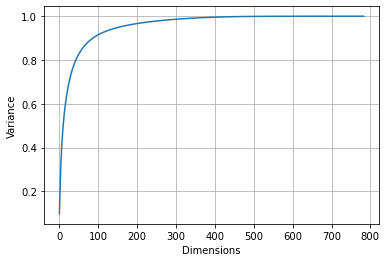

In [24]:
plt.plot(cumsum)
# plt.plot(thresholds, recalls[:-1], "r--", label="Recalls")
plt.xlabel("Dimensions")
plt.ylabel("Variance")
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show

In [31]:
X[2:3]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# from pandas.plotting import radviz
# plt.figure();
# radviz(result, "class");

In [7]:
#  THIS CODE HERE DOES SOME PLOTTING
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# some_digit = X[2:3]
# some_digit=some_digit.to_numpy()
# some_digit_image = some_digit.reshape(28, 28)
# plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")
# # save_fig("some_digit_plot")
# plt.show()

In [19]:
# X_centered =X - X.mean(axis=0)
# U, s, Vt = np.linalg.svd(X_centered)
# c1= Vt.T[:,0]
# c2= Vt.T[:,1]
# This code is unable to be executed as it needs a lot of space (36 GB) which is not possible

In [20]:
# pip install jupyterlab

In [21]:
# pip install jupyter_http_over_ws

In [22]:
# pip install jupyter_http_over_ws

In [23]:
# jupyter serverextension enable --py jupyter_http_over_ws

In [26]:
from tqdm.notebook import trange, tqdm
from time import sleep

In [11]:
# X

In [8]:
# THIS CODE HERE PLOTS THE DIGIT '5'
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# some_digit = X[:1]
# # some_digit_image =some_digit.reshape(28,28)
# type(some_digit)
# some_digit_numpy=some_digit.to_numpy()
# some_digit_image =some_digit_numpy.reshape(28,28)
# plt.imshow(some_digit_image, cmap="binary")
# plt.axis("off")
# plt.show()
# # Numpy array is needed for the image plot whereas for the prediction the panda data frame works
# # not numpy array

In [27]:
cumsum.shape

(784,)

In [29]:
%%time
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
from tqdm.notebook import trange, tqdm
from time import sleep

Wall time: 7.59 s


In [15]:
# X_train=X_train.to_numpy()
# X_test=X_test.to_numpy()
# y_train=y_train.to_numpy()
# y_test=y_test.to_numpy()

In [17]:
# X_train.shape
# nsamples, nx, ny =X_train.shape
# d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [12]:
y_train_5 = (y_train == 5) #Binary classifer which is true for all fives and not otherwise
y_train_5
y_test_5 = (y_test ==5)
y_test_5
# this is looking at data in the training set which is ==5 set as 1 and others 0

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

In [19]:
# Stochastic gradient classifier
# functions well as it can handle large datasets efficiently

In [33]:
%%time
# Creation of SGD classifier and training entire dataset on it
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42,shuffle=True)
sgd_clf.fit(X_train, y_train)


Wall time: 3min 31s


SGDClassifier(random_state=42)

In [59]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [60]:
%%time
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

Wall time: 212 ms


array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

In [90]:
%%time
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred,pos_label='positive',average='micro') # == 4096 / (4096 + 1522)


C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Wall time: 358 ms


0.8815833333333334

In [91]:
recall_score(y_train, y_train_pred, pos_label='positive',average='micro')

C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.8815833333333334

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

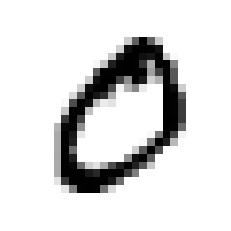

<ipython-input-103-81d67bb972a3>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot()


<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

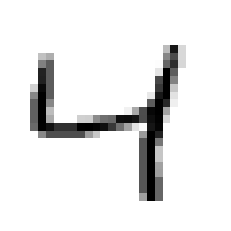

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

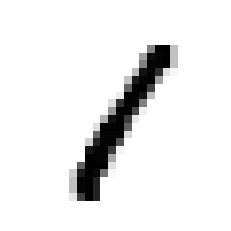

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

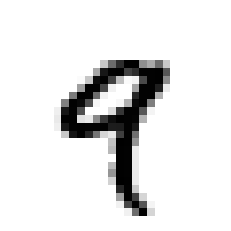

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

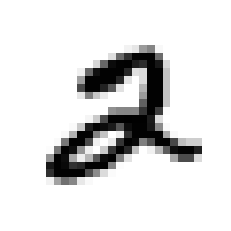

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

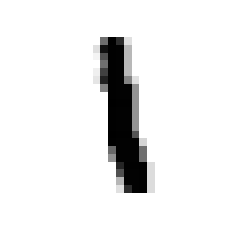

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

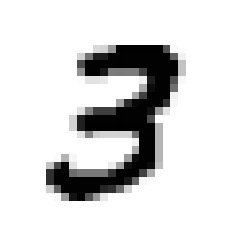

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

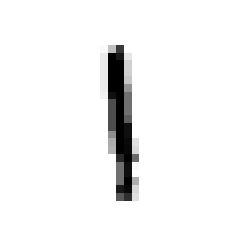

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

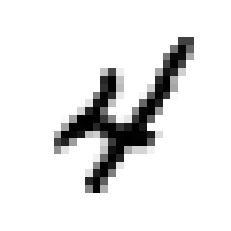

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

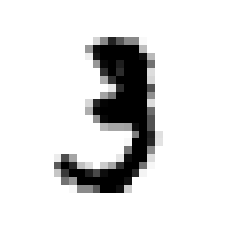

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

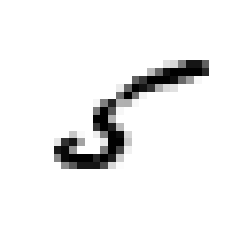

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

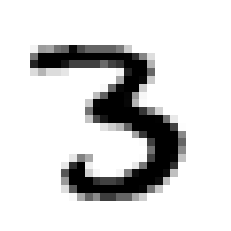

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

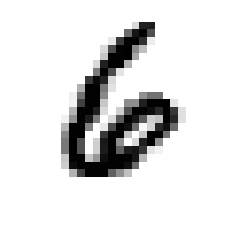

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

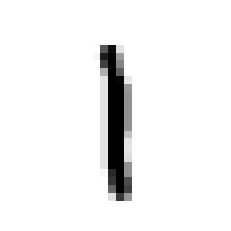

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

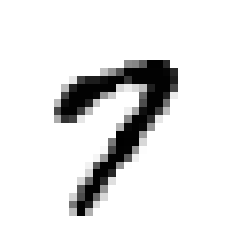

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

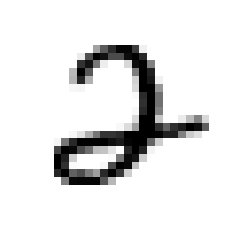

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

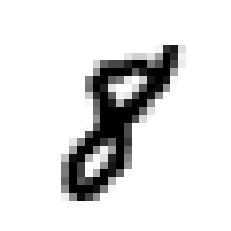

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

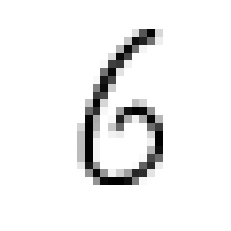

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

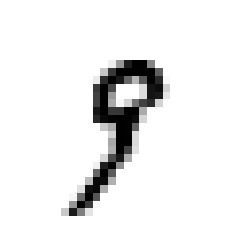

In [103]:
#  THIS CODE HERE DOES SOME PLOTTING
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
for i in range (1,20):
    some_digit = X[i:i+1]
    some_digit=some_digit.to_numpy()
    some_digit_image = some_digit.reshape(28, 28)
    fig.add_subplot()
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    # save_fig("some_digit_plot")
    plt.show()
    

# Running with the reduced dimensionality model

In [83]:
%%time
# Creation of SGD classifier and training entire dataset on it
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42,shuffle=True)
sgd_clf.fit(X_reduced, y_train)


Wall time: 44.1 s


SGDClassifier(random_state=42)

In [84]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_reduced, y_train, cv=3)

In [85]:
%%time
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

Wall time: 212 ms


array([[5647,    2,   39,   15,   12,   65,   78,   15,   37,   13],
       [   2, 6258,   50,   45,    5,   53,   45,   40,  219,   25],
       [  61,   67, 5084,  164,   85,   29,  166,   95,  160,   47],
       [  64,   27,  181, 5282,    7,  208,   49,   55,  120,  138],
       [  23,   29,   28,   17, 5257,   14,   64,   35,   93,  282],
       [ 126,   12,   59,  217,   96, 4427,  129,   47,  157,  151],
       [  75,   28,   68,    0,   72,  115, 5494,   11,   50,    5],
       [  36,   29,   70,   42,   71,   20,    6, 5662,   37,  292],
       [  61,  150,  112,  180,   41,  171,   90,   36, 4795,  215],
       [  44,   32,   20,  102,  295,   65,    3,  294,  105, 4989]],
      dtype=int64)

In [86]:
%%time
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred,pos_label='positive',average='micro') # == 4096 / (4096 + 1522)
# recall_score(y_train, y_train_pred)

Wall time: 340 ms


C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.8815833333333334

In [106]:
X_recovered = pca.inverse_transform(X_reduced)

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

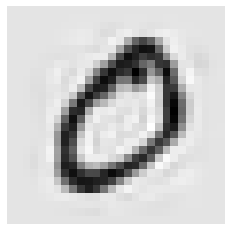

<ipython-input-108-90e70faf83ff>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot()


<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

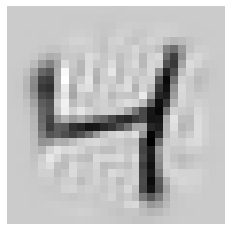

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

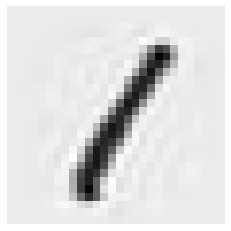

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

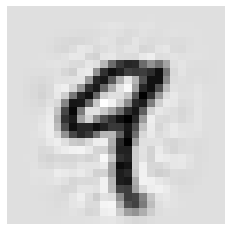

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

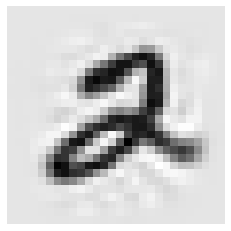

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

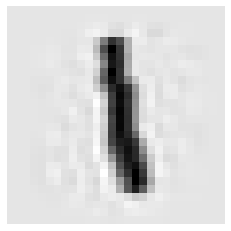

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

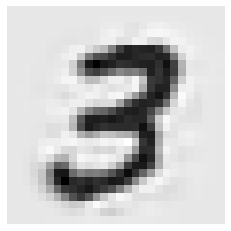

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

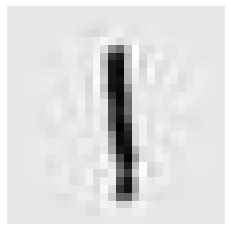

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

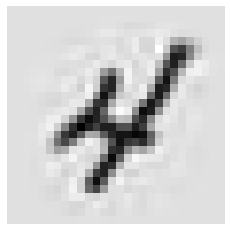

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

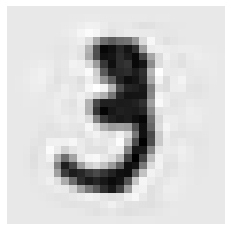

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

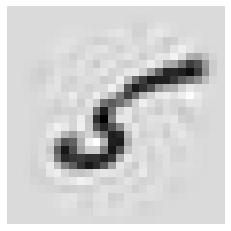

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

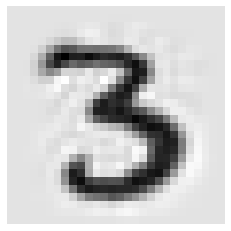

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

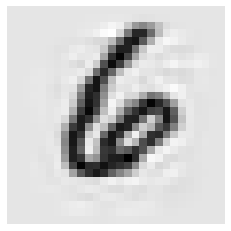

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

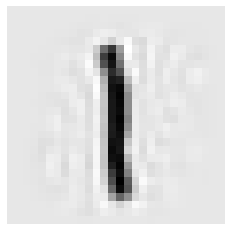

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

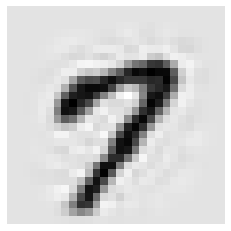

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

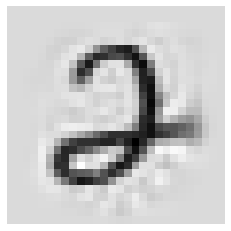

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

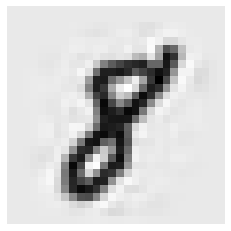

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

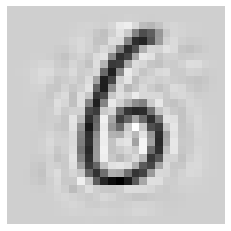

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

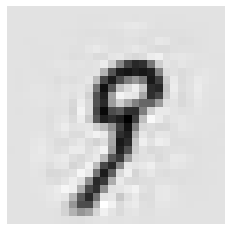

In [108]:
#  THIS CODE HERE DOES SOME PLOTTING
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
for i in range (1,20):
    some_digit = X_recovered[i:i+1]
#     some_digit=some_digit.to_numpy()
    some_digit_image = some_digit.reshape(28, 28)
    fig.add_subplot()
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    # save_fig("some_digit_plot")
    plt.show()
    

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma= 0.4)
X_reduced = rbf_pca.fit_transform()

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)

X_reduced = rbf_pca.fit_transform(X)

# KPCA=kernel PCA

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

In [ ]:
# NOT POSSIBLE TO RUN GRIDSEARCHCV WITH THE MNIST data
clf= Pipeline([
    ("kpca", KernelPCA(n_components =2)),
    ("log_reg", LogisticRegression())
])
param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10),
    "kpca__kernel" : ["rbf", "sigmoid"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)


C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Sangram\miniconda3\envs\Hands_conda\lib\site-packag